In [48]:
import matplotlib.pyplot as plt
import re
import os
import sys
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped")

import numpy as np
from scipy.stats import norm
from settings_and_potential import *
font_size=25
lw=4

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 
# nrank = sys.argv[0]
range_bins=[-3,3]
tau=0.1
s=1

In [47]:
#define DIVTERM          //define to use
m=0.001      #     // minimum step scale factor
M=1.5       #       // maximum step scale factor
dt=0.0005     #      // artificial time stepsize
gamma=0.1         #   // friction coefficient
tau=0.1          #  // 'temperature'
numruns=8000         # // total number of trajectories
numsam=10  
r=0.01
nsnapshot=5

<ipython-input-50-f7ed30b2109e>:7: RuntimeWarning: divide by zero encountered in true_divide
  f=1/(x*x-1)
<ipython-input-50-f7ed30b2109e>:16: RuntimeWarning: divide by zero encountered in true_divide
  f=1/(x*x-1)
<ipython-input-50-f7ed30b2109e>:17: RuntimeWarning: divide by zero encountered in true_divide
  fp = 2*x/(xx21*xx21);
<ipython-input-50-f7ed30b2109e>:22: RuntimeWarning: invalid value encountered in true_divide
  gprime=num/(den1*den2*den2)


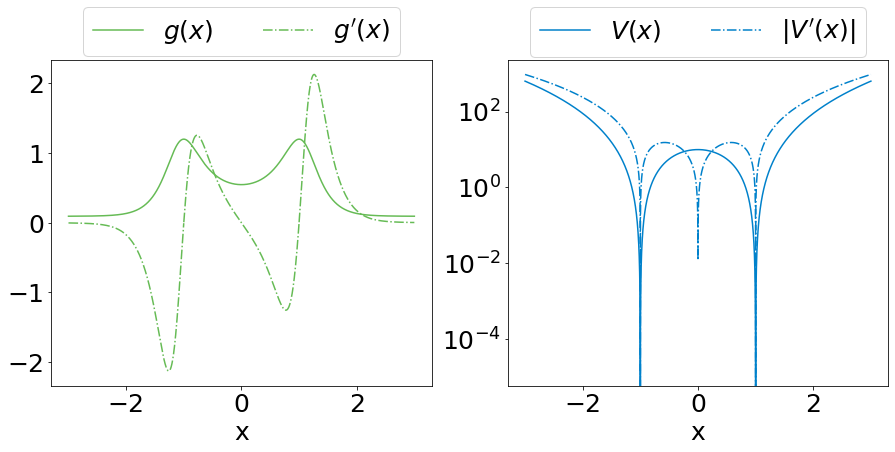

In [50]:
## plot
# M=1.2
# r=1
# m=0.1 
# s=10
def gfunc(x):
    f=1/(x*x-1)
    fabs=abs(f)
    fabs2=fabs*fabs
    xi=fabs2*fabs2*r+m*m
    g=1/(1/M+1/np.sqrt(xi))
    return g

def getgprime(x):
    xx21=x*x-1
    f=1/(x*x-1)
    fp = 2*x/(xx21*xx21);
    xi=np.sqrt(r*f*f*f*f+m*m)
    den1=xi*xi*xi
    den2=(1/xi+1/M)
    num = 2*f*fp*f*f
    gprime=num/(den1*den2*den2)
    return(gprime)

def getU(x):
    res =s*np.power(x*x-1,2)
    return res

def getUp(x):
    res =4*s*(x*x-1)*x
    return res
fig, ((axs))= plt.subplots(1,2,figsize=(15,6))# plt.figure(figsize=(4,4))

slist=np.linspace(-3,3,10000)
axs[0].plot(slist,gfunc(slist),color=mygreen,label="$g(x)$")
axs[0].plot(slist,getgprime(slist),"-.",color=mygreen,label="$g'(x)$")
axs[1].semilogy(slist,getU(slist),color=myblue,label="$V(x)$")
axs[1].semilogy(slist,np.abs(getUp(slist)),"-.",color=myblue,label="$|V'(x)|$")

axs[0].legend(fontsize=font_size, loc="upper center",ncol=3,bbox_to_anchor=(0.5, 1.2))
axs[0].set_xlabel("x", fontsize=font_size)
axs[1].set_xlabel("x", fontsize=font_size)

axs[1].legend(fontsize=font_size, loc="upper center",ncol=3,bbox_to_anchor=(0.5, 1.2))


In [63]:
#/////////////////////////////////////////
#// Anisotropique potential definition //
#////////////////////////////////////////
def U(x):
    res = np.log(s*(x*x-1)*(x*x-1))
    return res
#define DIVTERM          //define to use
m=0.001      #     // minimum step scale factor
M=1.5       #       // maximum step scale factor
dt=0.0005     #      // artificial time stepsize
gamma=0.1         #   // friction coefficient
tau=0.1          #  // 'temperature'
numruns=500000         # // total number of trajectories
numsam=10000  
r=0.01
def getg(x):
    f=4*(x*x-1)
    fabs=np.abs(f)
    xi=fabs*fabs*fabs*r+m*m
    den=1/M+1/np.sqrt(xi)
    g=1/den
    return(g)


In [64]:
#######################################################
##### what do you want to run
#######################################################
## run the sample to check the look of the distributions 

q_noada,p_noada,g=openCfile_qp("data_one_dt/vec_noada.txt")
q_tr,p_tr,g=openCfile_qp("data_one_dt/vec_tr.txt")
g1,g2,g3=openCfile_qp("data_one_dt/val_g_ada.txt")


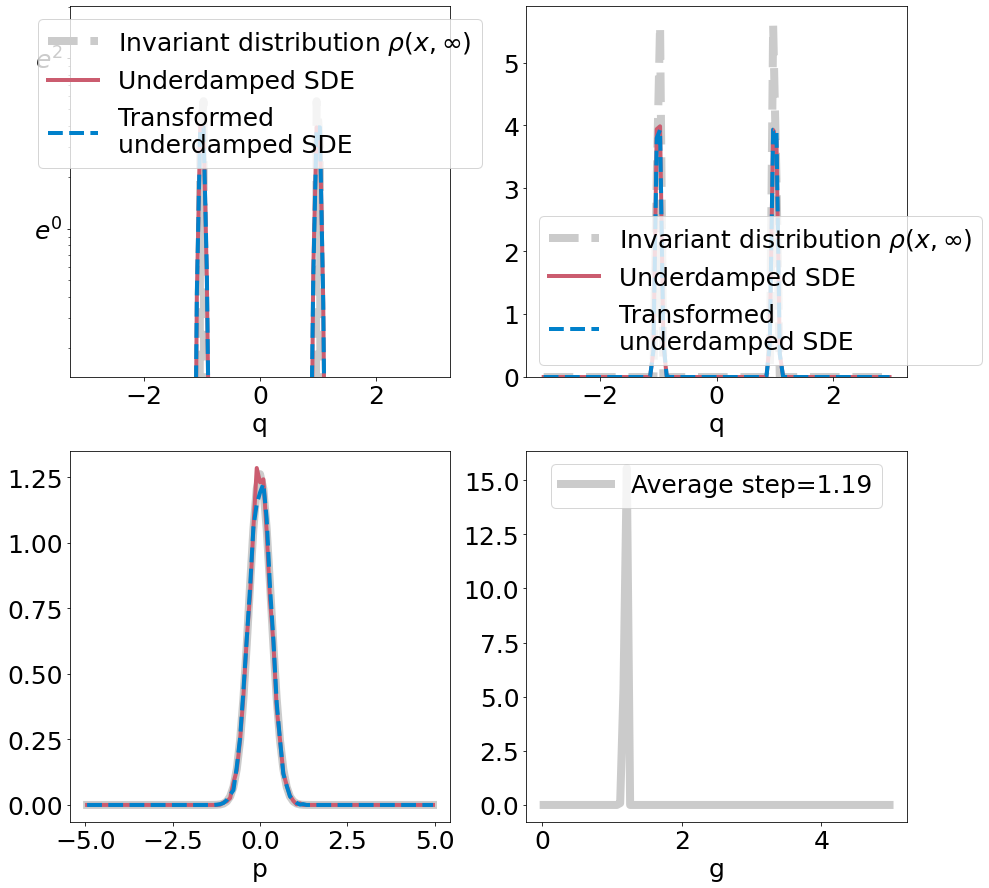

In [65]:

fig, ((axs))= plt.subplots(2,2,figsize=(15,15))# plt.figure(figsize=(4,4))
# fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=105

############
## Q vals ##
############
# SDE
histogram_noada,bins = np.histogram(q_noada,bins=nbins,range=range_bins, density=True)
midx_sde = (bins[0:-1]+bins[1:])/2

#transformed
histogram_tr,bins = np.histogram(q_tr,bins=nbins,range=range_bins, density=True)
midx_tr = (bins[0:-1]+bins[1:])/2

# # rescaled
# histogram_re,bins = np.histogram(x_re,bins=nbins,range=range_bins, density=True)
# midx_re = (bins[0:-1]+bins[1:])/2

# Invariant distribution for q
rho = np.exp(- U(midx_sde)/tau)
# # normal dis
# rho = np.exp(- 0.5*midx_tr*midx_tr/tau)
rho = rho / (np.sum(rho)* (midx_sde[1]-midx_sde[0]) ) # Normalize rho by dividing by its approx. integral

# Log Q 
#######
axs[0,0].semilogy(midx_sde,(rho),"--",linewidth=lw*2,label='Invariant distribution $\\rho(x,\\infty)$',color=mygrey)
axs[0,0].semilogy(midx_sde,(histogram_noada),"-",linewidth=lw,label='Underdamped SDE',color=myred)
# axs.plot(midx_re,histogram_re,"--",linewidth=2.5,label='Underdamped SDE\nwith naive time rescaling',color=myblue)
axs[0,0].semilogy(midx_tr,(histogram_tr),"--",linewidth=lw,label='Transformed\nunderdamped SDE',color=myblue)
axs[0,0].set_ylim(np.exp(-2),np.exp(3))
axs[0,0].set_xlabel("q", fontsize=font_size)
def ticks(y, pos):
    return r'$e^{:.0f}$'.format(np.log(y))

# axs[1].xaxis.set_major_formatter(mtick.FuncFormatter(ticks))
axs[0,0].yaxis.set_major_formatter(mtick.FuncFormatter(ticks))


axs[0,0].legend(loc='upper center',
          ncol=1,fontsize=font_size) #, bbox_to_anchor=(0.5, 1.33),


# Q
###
axs[0,1].plot(midx_sde,rho,"--",linewidth=lw*2,label='Invariant distribution $\\rho(x,\\infty)$',color=mygrey)
axs[0,1].plot(midx_sde,histogram_noada,"-",linewidth=lw,label='Underdamped SDE',color=myred)
# axs.plot(midx_re,histogram_re,"--",linewidth=2.5,label='Underdamped SDE\nwith naive time rescaling',color=myblue)
axs[0,1].plot(midx_tr,histogram_tr,"--",linewidth=lw,label='Transformed\nunderdamped SDE',color=myblue)
axs[0,1].set_ylim(0,np.max(rho)+0.3)
axs[0,1].set_xlabel("q", fontsize=font_size)
axs[0,1].legend(fontsize=font_size)


############
## P vals ## 
############
range_bins=[-5.,5.]

# no ada
histogram_noada,bins = np.histogram(p_noada,bins=nbins,range=range_bins, density=True)
midx_noada = (bins[0:-1]+bins[1:])/2

# transformed
histogram_tr,bins = np.histogram(p_tr,bins=nbins,range=range_bins, density=True)
midx_tr = (bins[0:-1]+bins[1:])/2

# Invariant distribution for p
### momentum p invariant
rho = np.exp(-(midx_noada**2)/(2*tau))
rho = rho / (np.sum(rho)* (midx_noada[1]-midx_noada[0]) ) # Normalize rho by dividing by its approx. integral

axs[1,0].plot(midx_noada,rho,linewidth=lw*2,label='Invariant distribution $\\rho(x,\\infty)$',color=mygrey)
axs[1,0].plot(midx_noada,histogram_noada,"-",linewidth=lw,label='Underdamped SDE',color=myred)
# axs.plot(midx_re,histogram_re,"--",linewidth=2.5,label='Overdamped SDE\nwith naive time rescaling',color=myblue)
axs[1,0].plot(midx_tr,histogram_tr,"--",linewidth=lw,label='Transformed\nunderdamped SDE',color=myblue)
axs[1,0].set_xlabel("p", fontsize=font_size)
# axs[1,0].legend(fontsize=font_size)
# plt.show()

############
## Histograms g vals ## 
############
range_bins=[0,5]
histogram_g,bins = np.histogram(g1,bins=nbins,range=range_bins, density=True)
midx_noada = (bins[0:-1]+bins[1:])/2
mean_g=round(np.mean(g1),2)

axs[1,1].plot(midx_noada,histogram_g,linewidth=lw*2,label='Average step='+str(mean_g),color=mygrey)
axs[1,1].set_xlabel("g", fontsize=font_size)
axs[1,1].legend(fontsize=font_size, loc="upper center")

fig.savefig('figures/one_dt.png')


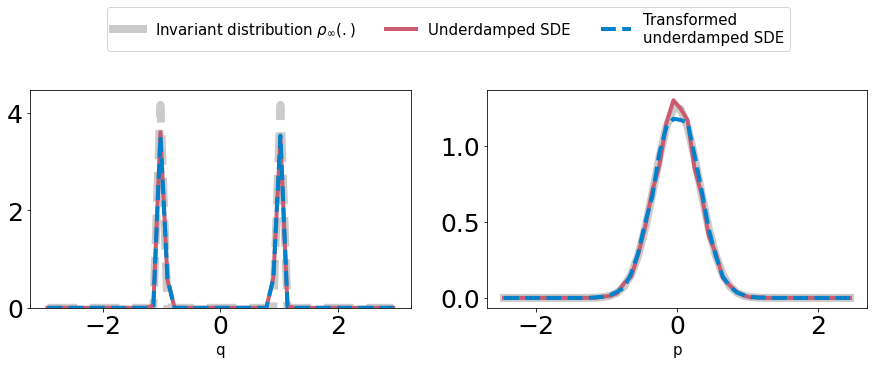

In [66]:
fig, ((axs))= plt.subplots(1,2,figsize=(15,4))# plt.figure(figsize=(4,4))
# fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=50
range_bins=[-3.,3.]
font_size=15

# SDE
histogram_noada,bins = np.histogram(q_noada,bins=nbins,range=range_bins, density=True)
midx_sde = (bins[0:-1]+bins[1:])/2

#transformed
histogram_tr,bins = np.histogram(q_tr,bins=nbins,range=range_bins, density=True)
midx_tr = (bins[0:-1]+bins[1:])/2

# # rescaled
# histogram_re,bins = np.histogram(x_re,bins=nbins,range=range_bins, density=True)
# midx_re = (bins[0:-1]+bins[1:])/2

# Invariant distribution for q
rho = np.exp(- U(midx_sde)/tau)
# # normal dis
# rho = np.exp(- 0.5*midx_tr*midx_tr/tau)
rho = rho / (np.sum(rho)* (midx_sde[1]-midx_sde[0]) ) # Normalize rho by dividing by its approx. integral

# Q
###6
axs[0].plot(midx_sde,rho,"--",linewidth=lw*2,label='Invariant distribution $\\rho(x,\\infty)$',color=mygrey)
axs[0].plot(midx_sde,histogram_noada,"-",linewidth=lw,label='Underdamped SDE',color=myred)
# axs.plot(midx_re,histogram_re,"--",linewidth=2.5,label='Underdamped SDE\nwith naive time rescaling',color=myblue)
axs[0].plot(midx_tr,histogram_tr,"--",linewidth=lw,label='Transformed\nunderdamped SDE',color=myblue)
axs[0].set_ylim(0,np.max(rho)+0.3)
axs[0].set_xlabel("q", fontsize=font_size)
# axs[0].legend(fontsize=font_size)


############
## P vals ## 
############
range_bins=[-2.5,2.5]

# no ada
histogram_noada,bins = np.histogram(p_noada,bins=nbins,range=range_bins, density=True)
midx_noada = (bins[0:-1]+bins[1:])/2

# transformed
histogram_tr,bins = np.histogram(p_tr,bins=nbins,range=range_bins, density=True)
midx_tr = (bins[0:-1]+bins[1:])/2

# Invariant distribution for p
### momentum p invariant
rho = np.exp(-(midx_noada**2)/(2*tau))
rho = rho / (np.sum(rho)* (midx_noada[1]-midx_noada[0]) ) # Normalize rho by dividing by its approx. integral

axs[1].plot(midx_noada,rho,linewidth=lw*2,label='Invariant distribution $\\rho_{\\infty}(.)$',color=mygrey)
axs[1].plot(midx_noada,histogram_noada,"-",linewidth=lw,label='Underdamped SDE',color=myred)
# axs.plot(midx_re,histogram_re,"--",linewidth=2.5,label='Overdamped SDE\nwith naive time rescaling',color=myblue)
axs[1].plot(midx_tr,histogram_tr,"--",linewidth=lw,label='Transformed\nunderdamped SDE',color=myblue)
axs[1].set_xlabel("p", fontsize=font_size)
axs[1].legend(fontsize=font_size,loc="upper center",ncol=3,bbox_to_anchor=(-0.1, 1.42),)